In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.externals import joblib
from matplotlib import pyplot as plt

/home/lingjun/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
target = 'mnist'
#target = '20news'
#target = 'mnist'

model = 'rnn'
# model = 'dnn'

In [3]:
tau = []
jaccard = []
for seed in range(1):
#for seed in range(50):
    res1 = joblib.load('./%s_%s/infl_true%03d.dat' % (target, model, seed))
    res2 = joblib.load('./%s_%s/infl_sgd%03d.dat' % (target, model, seed))
    res3 = joblib.load('./%s_%s/infl_icml%03d.dat' % (target, model, seed))
    if np.sum(np.isnan(res3)) > 0:
        print(seed)
        continue
    tau.append((stats.kendalltau(res1, res2)[0], stats.kendalltau(res1, res3)[0]))
    idx1 = np.argsort(res1)
    idx1 = np.r_[idx1[:10], idx1[-10:]]
    idx2 = np.argsort(res2)
    idx2 = np.r_[idx2[:10], idx2[-10:]]
    idx3 = np.argsort(res3)
    idx3 = np.r_[idx3[:10], idx3[-10:]]
    jaccard.append((np.intersect1d(idx1, idx2).size / np.union1d(idx1, idx2).size, np.intersect1d(idx1, idx3).size / np.union1d(idx1, idx3).size))
print('Kendall tau', np.mean(tau, axis=0), np.std(tau, axis=0))
print('Jaccard index', np.mean(jaccard, axis=0), np.std(jaccard, axis=0))

Kendall tau [0.99894441 0.51978086] [0. 0.]
Jaccard index [1.         0.05263158] [0. 0.]


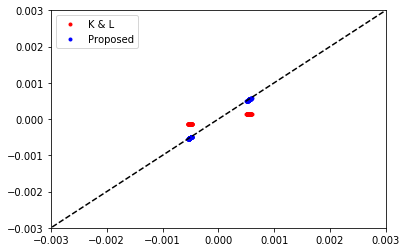

In [8]:
seed = 0

res1 = joblib.load('./%s_%s/infl_true%03d.dat' % (target, model, seed))
res2 = joblib.load('./%s_%s/infl_sgd%03d.dat' % (target, model, seed))
res3 = joblib.load('./%s_%s/infl_icml%03d.dat' % (target, model, seed))

plt.plot(res1, res3, 'r.')
plt.plot(res1, res2, 'b.')
plt.plot([-1, 1], [-1, 1], 'k--')
plt.xlim([-0.003, 0.003])
plt.ylim([-0.003, 0.003])
#plt.axis('square')
# plt.xlim([-0.007, 0.007])
# plt.ylim([-0.007, 0.007])
plt.legend(['K & L', 'Proposed'])
plt.show()